In [3]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
!pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 2.6 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=f2401b43f8b8db7213cfd761d900f877966bd659dfcbc1584b69736be3dfd413
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling ch

In [4]:
import pandas as pd
from googletrans import Translator
import numpy as np
import re
import matplotlib.pyplot as plt
import os

In [5]:
path="/content/gdrive/MyDrive/ml_2_sem_data/"

In [240]:
food_data=pd.read_csv(path+"features.csv")

In [124]:
food_data.head()

,product_id,name,unit_price,geohash,primary_cuisine
0,055e72373069,Small,0.496,u6scd,pizza
1,ec33db14a2c5,Alcachofas Empinzadas,0.304,u6scd,spanskt
2,fa04d9e5b964,Coca-Cola 2L,0.240,u6scq,pizza
3,9f502de9373e,"5 Lax, 5 Räkor, 5 Avokado",0.820,u6sck,sushi
4,f917c5731301,Kyckling Szechuan Special,0.632,u6sc4,kinesiskt


In [76]:
food_data.shape

(111046, 5)

In [292]:
food_data.describe()

,unit_price
count,96578.000000
mean,0.291763
std,0.281814
min,0.000000
25%,0.000000
50%,0.200000
75%,0.516000
max,1.000000


In [293]:
category_counts=food_data.primary_cuisine.value_counts()
category_counts

burgers              21697
pizza                20946
café                  7383
indian                7048
asian                 5820
italian               5061
sushi                 4730
thai                  2493
sandwiches            2204
swedish               1882
the middle east       1717
japanese              1626
mexican               1541
american              1451
snack bar             1418
greek                 1164
salad                  917
lebanese               912
vegetarian             743
kebab                  739
chinese                735
international          724
bakery                 680
unknown                543
spanish                517
meat                   365
mediterranean sea      285
chicken                260
vietnamese             186
healthy                164
bangladeshi            162
turkish                155
french                  97
south american          58
african                 45
brazilian               33
korea                   29
f

<BarContainer object of 40 artists>

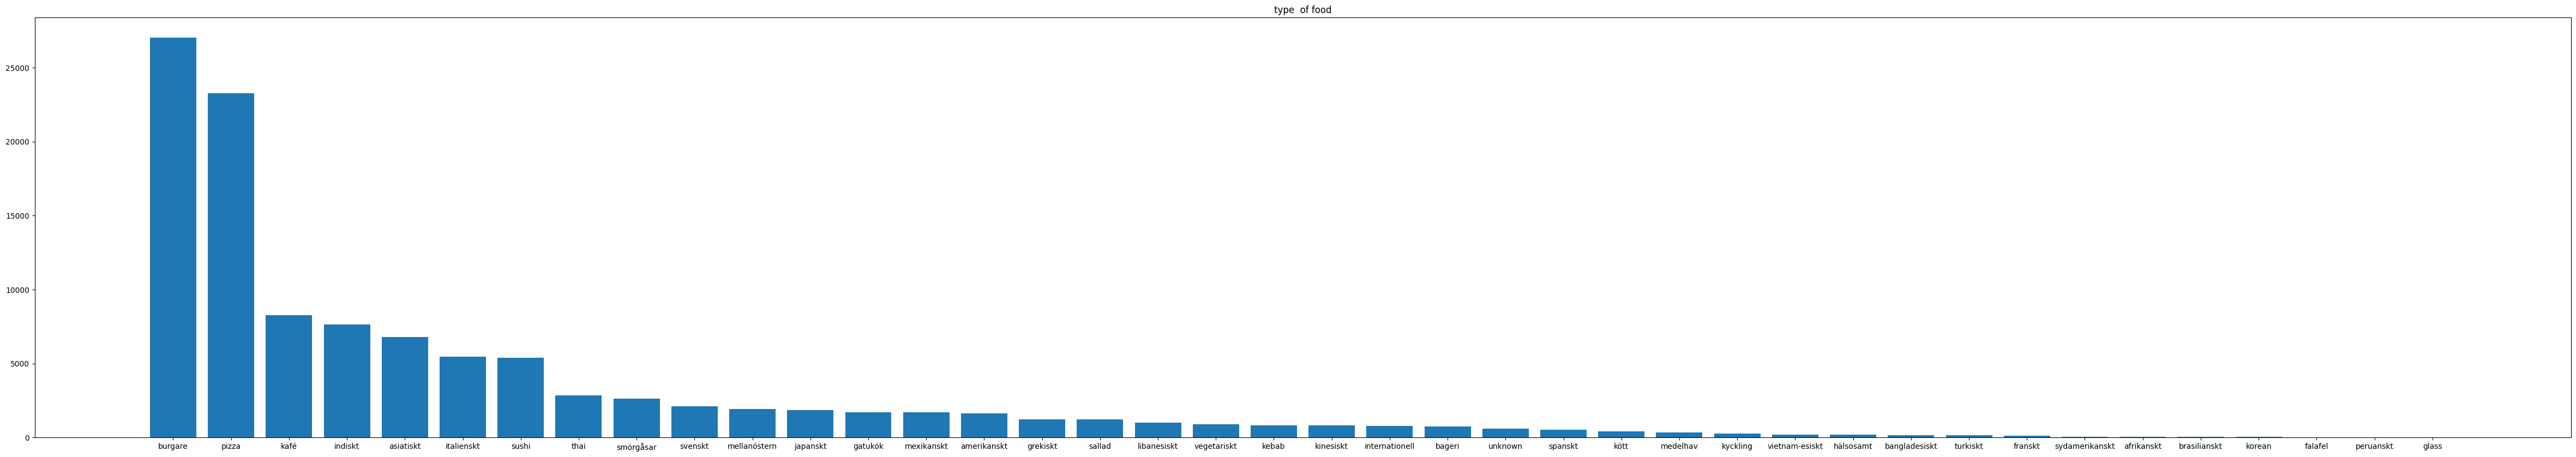

In [126]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(60, 10))
ax = fig.add_subplot( title='type  of food')
ax.bar(category_counts.index,category_counts.values)

In [302]:
food_data.geohash.value_counts().index


Index(['u6scd', 'u6sce', 'u6sc7', 'u6sc9', 'u6sc6', 'u6sc8', 'u6scb', 'u6sc5',
       'u6sc3', 'u6sck', 'u6sc1', 'u6scc', 'u6sc4', 'u6sc2', 'u6scm', 'u6scs',
       'u6sch', 'u6sct', 'u6scf', 'u6scn', 'u6sc0', 'u6scq', 'u6scw', 'u6scg',
       'u6scv', 'u6scp', 'u6scr'],
      dtype='object')

<BarContainer object of 27 artists>

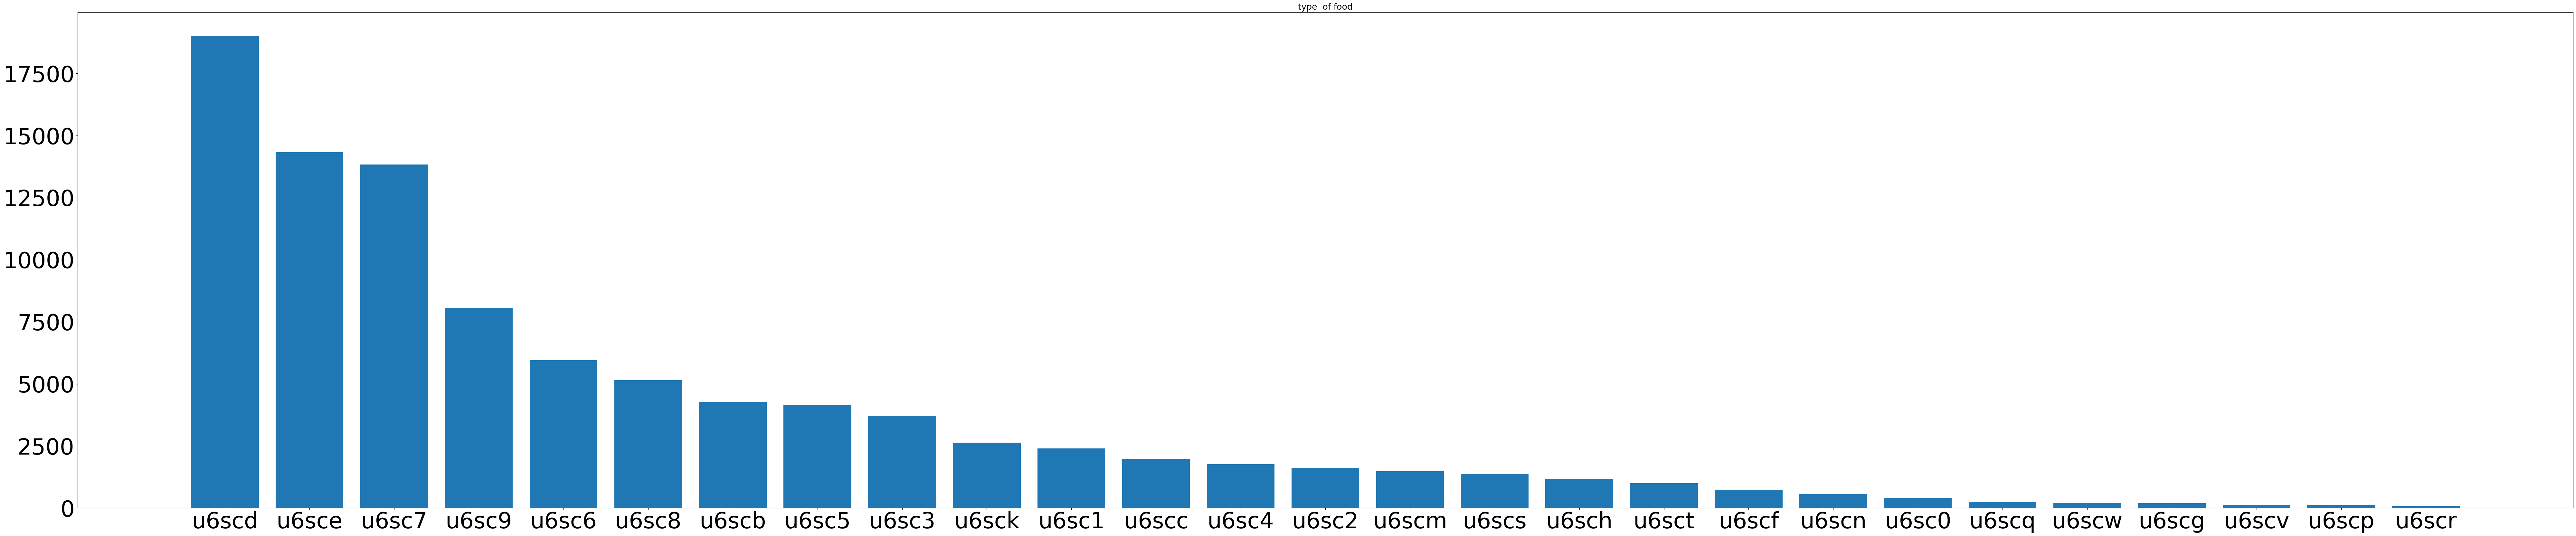

In [312]:
fig1 = plt.figure(figsize=(100, 20))
ax1 = fig1.add_subplot( title='type  of food')
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
	label.set_fontsize(50)
ax1.bar(food_data.geohash.value_counts().index,food_data.geohash.value_counts().values)

<Axes: ylabel='geohash'>

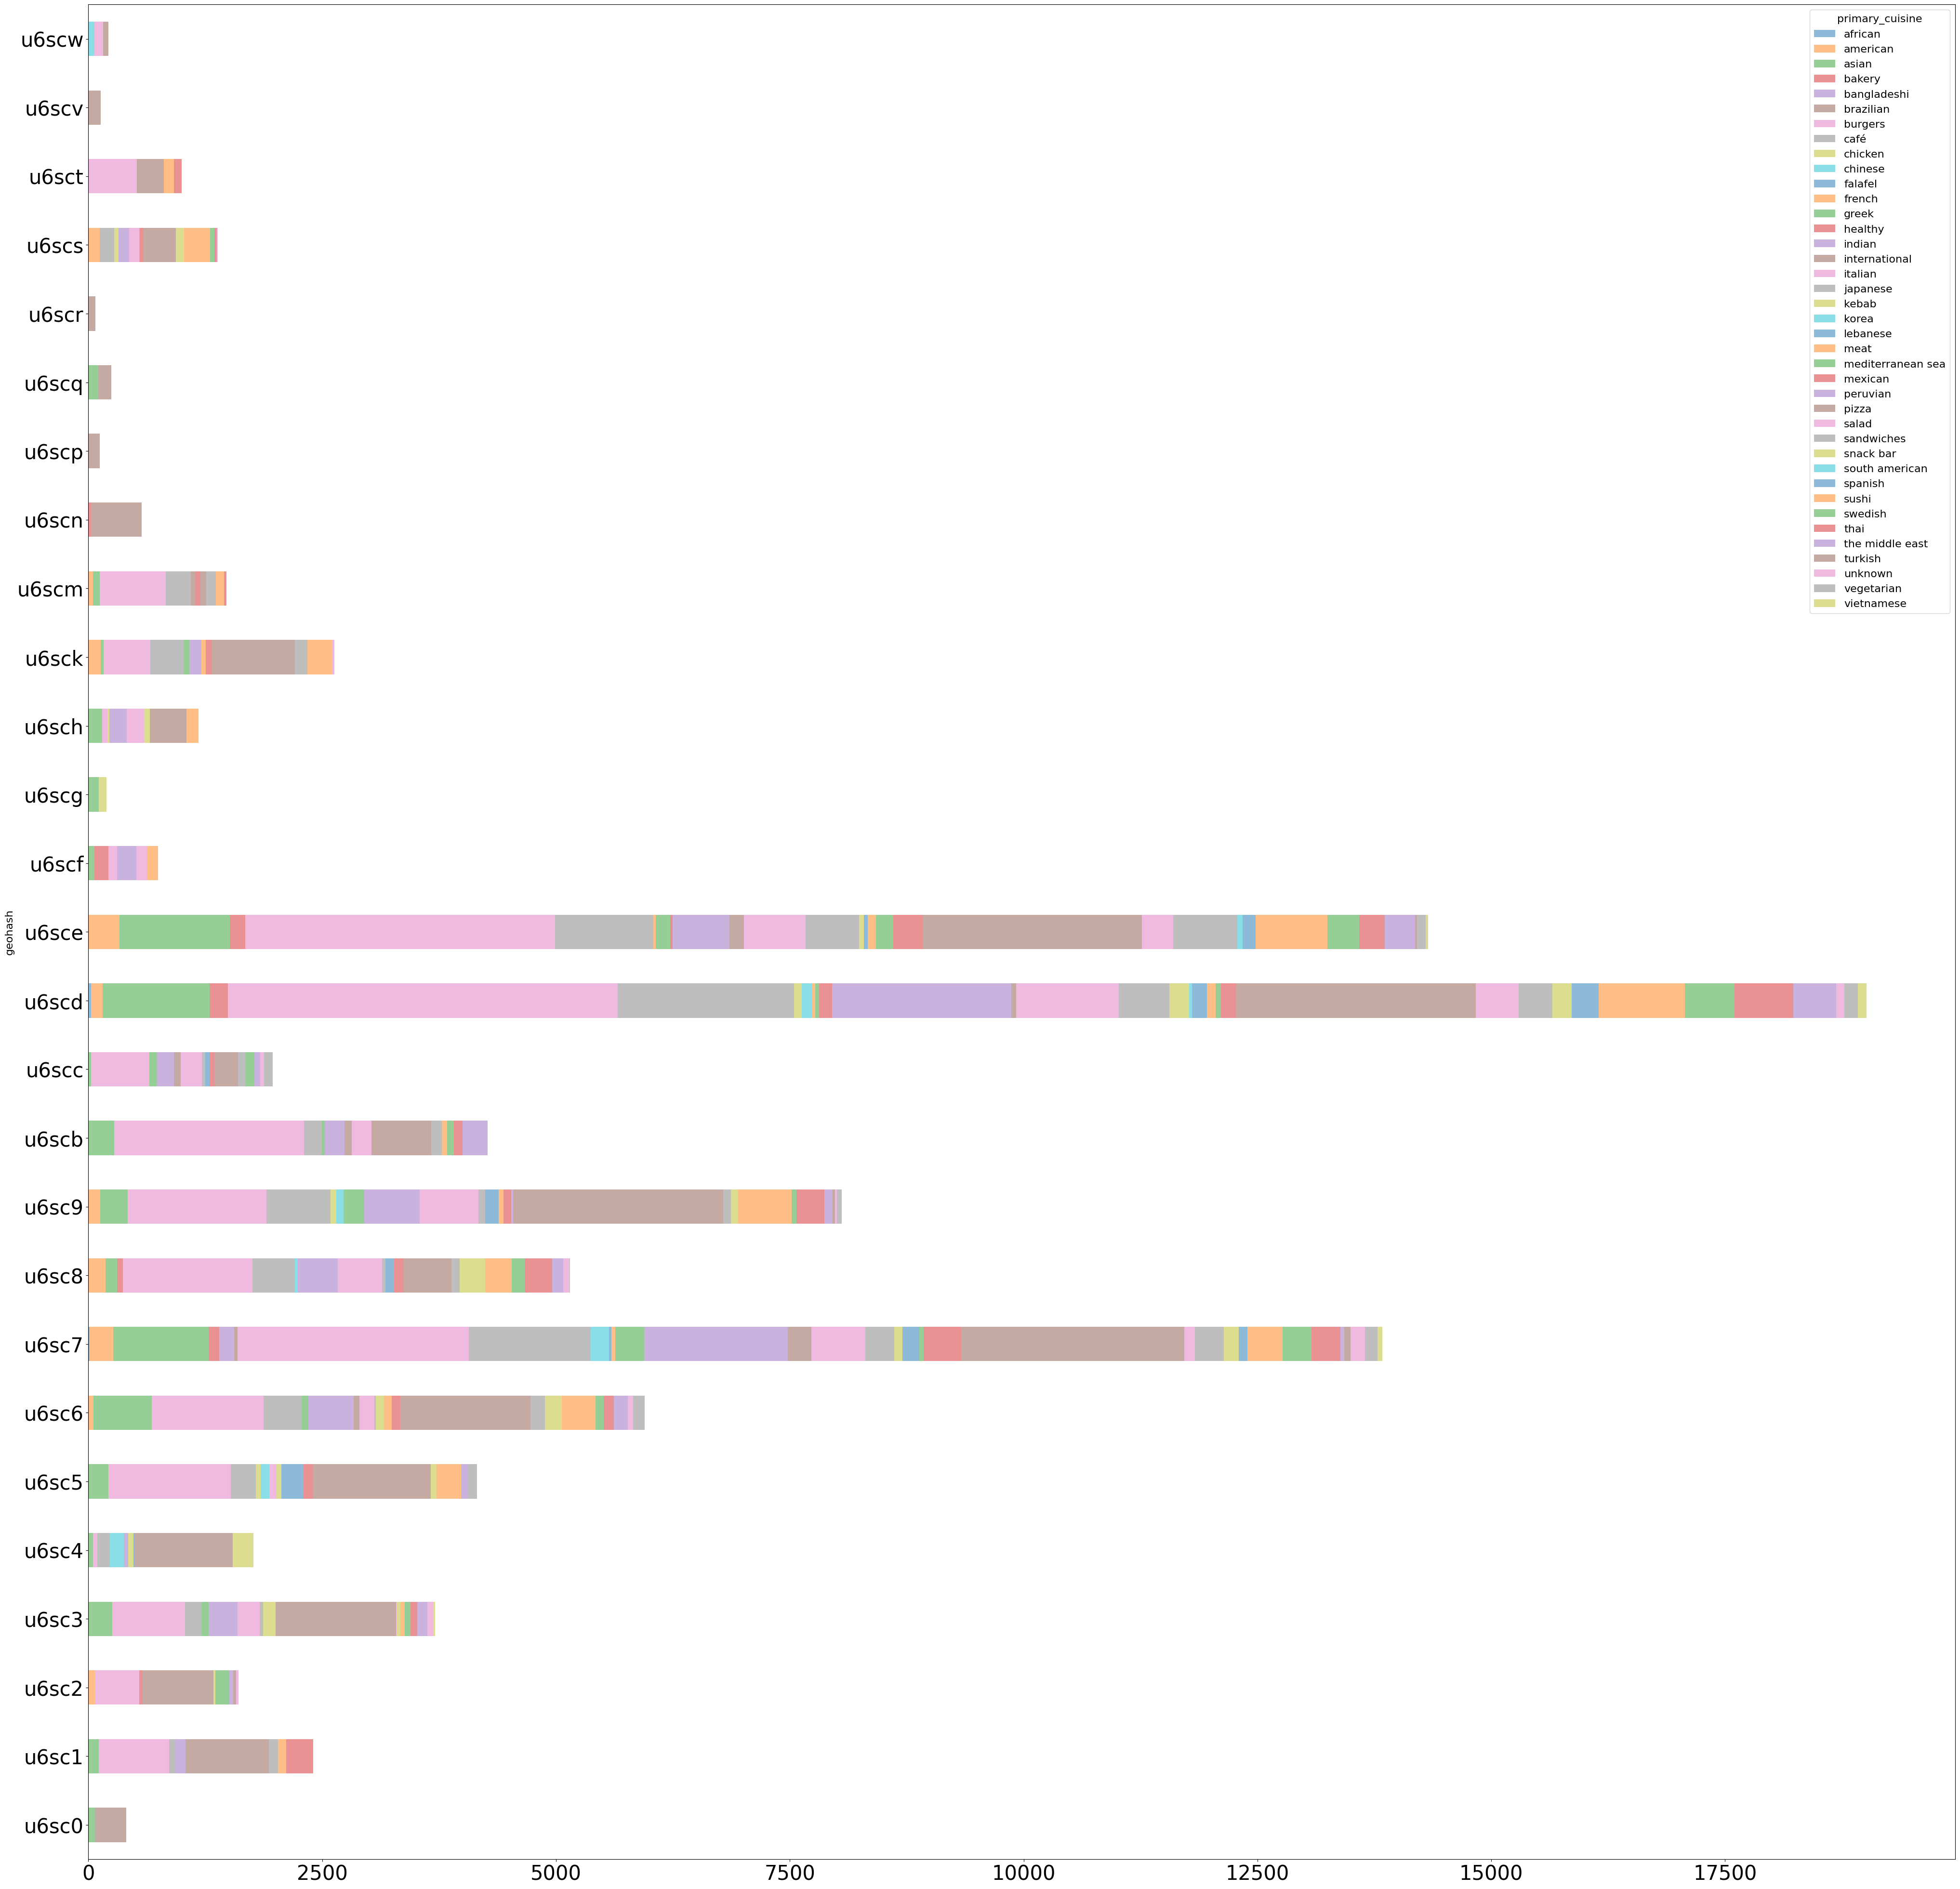

In [379]:
t=pd.crosstab(food_data['geohash'], food_data['primary_cuisine'])

t.plot.barh(stacked=True, alpha=0.5,figsize=(50, 50),fontsize=30, style=[{'size':26}])

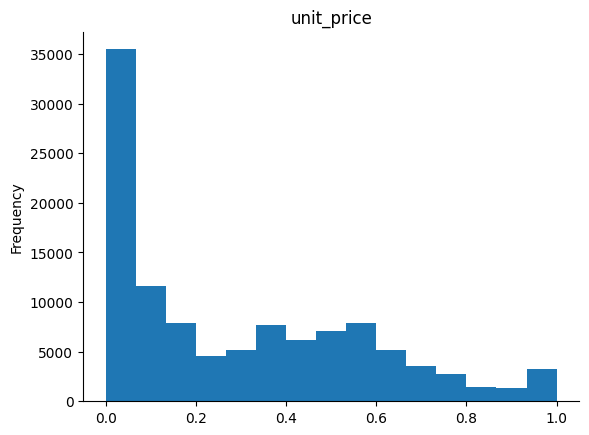

In [128]:
food_data.unit_price.plot(kind='hist', bins=15, title='unit_price')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [146]:
food_data.name.value_counts()

coca-cola zero 33 cl                641
coca-cola original taste 33 cl      615
räkor                               455
bacon                               403
tonfisk                             400
                                   ... 
tokyo sushi 17 bitar                  1
king prawn tikka masala (medium)      1
masala uttapam                        1
bigoli al gamberoni                   1
simpsons pizza                        1
Name: name, Length: 27327, dtype: int64

In [241]:
food_data.name=food_data.name.str.lower()
food_data.name=food_data.name.str.lstrip()
food_data.name=food_data.name.str.rstrip()
food_data.name=food_data.name.str.replace('®','')
food_data.head()

,product_id,name,unit_price,geohash,primary_cuisine
0,055e72373069,small,0.496,u6scd,pizza
1,ec33db14a2c5,alcachofas empinzadas,0.304,u6scd,spanskt
2,fa04d9e5b964,coca-cola 2l,0.240,u6scq,pizza
3,9f502de9373e,"5 lax, 5 räkor, 5 avokado",0.820,u6sck,sushi
4,f917c5731301,kyckling szechuan special,0.632,u6sc4,kinesiskt


In [242]:
food_data=food_data[food_data.name.apply(lambda x: len(x)>2)]

In [243]:
patern_inside_patern=('kg','st','g','cl','p','bitar','cm','pcs','vegan','l','liter','pieces','perosner','pers',' personer', 'gr','person','gram','pack','vegansk','sliders')
re_paterns_with_format="^\d*\D*{format_pattern}[\.]?$"

for format_pattern in patern_inside_patern:
    pattern=re.compile(re_paterns_with_format.format(format_pattern=format_pattern))
    food_data=food_data[~food_data.name.apply(lambda x: bool(re.search(pattern,x)))]


In [244]:
re_pattern_to_del=(re.compile(r"^\d+[\.,\"]?$"),re.compile(r"^[\.,\-,\*,\+]+$"),re.compile(r"^\d+$"),
re.compile(r"^\d+\s*\-\s*\d+\s*pers[oner]*$"),re.compile(r"^\d+\s*x\s*\d+\s*g[r]?$"),
re.compile(r"^\d+\s*x\s*\d+\s*gram$"), re.compile(r"^\D+\d+$"),
re.compile(r"^,jklö$"),re.compile(r"\d+\,\d+\s*l$"), re.compile("^ö+$"),re.compile(r"^\d+\s*st\s*\d+\s*gram$"),
                   re.compile(r"^\d+\:an$"), re.compile(r"^a+$"),re.compile(r"^\d+\s*st\s*\d+\s*g$"),
                   re.compile("^ä+$"),re.compile("^\(veg\)$"))

for pattern in re_pattern_to_del:
  food_data=food_data[~food_data.name.apply(lambda x: bool(re.search(pattern,x)))]

In [245]:
re_paterns_without_format=(re.compile("^\d+\."), re.compile(r"^[\#\*\+\-\.]+"), re.compile(r"^\d+\s*[abcd]*\."),
                           re.compile(r"^\d+\.\d+\."),re.compile(r"^nr\.\d+"),re.compile(r"^[st]+\.*\d+"),re.compile(r"\(\d+\)$"),
                           re.compile(r"^1889"),re.compile(r"\.$"))
for pattern in re_paterns_without_format:
  food_data.name=food_data.name.apply(lambda x: re.sub(pattern,'',x))


In [246]:
food_data.name=food_data.name.str.lstrip()
food_data.name=food_data.name.str.rstrip()
food_data.name=food_data.name.str.replace('"','')

In [247]:
food_data.name.value_counts()

coca-cola zero 33 cl              641
coca-cola original taste 33 cl    615
räkor                             455
bacon                             422
tonfisk                           400
                                 ... 
best vegetarisk sizlar              1
all in!                             1
baghalipolo ba mahichce             1
fallumirulle                        1
simpsons pizza                      1
Name: name, Length: 26531, dtype: int64

In [248]:
path_to_food_name="/content/food_name.txt"
if os.path.isfile(path_to_food_name):
    os.remove(path_to_food_name)
    print("File has been deleted")
else:
    print("File does not exist")
with open(path_to_food_name, 'w') as filename:
  for name  in sorted(food_data.name.value_counts().index):
    filename.write(f"{str(name)}\n")

File has been deleted


In [249]:
food_data=food_data[food_data.primary_cuisine!='glass']

In [223]:
ts=Translator()

In [235]:
primary_cusine_sv=list(food_data.primary_cuisine.value_counts().index)

In [228]:
primary_cusine_en=ts.translate(primary_cusine_sv,src='sv')

In [232]:
primary_cusine_en=[word.text for word in primary_cusine_en]


AttributeError: ignored

In [233]:
primary_cusine_en=[word.lower() for word in primary_cusine_en]

In [255]:
dict_with_translation_cusine=dict(zip(primary_cusine_sv,primary_cusine_en))
dict_with_translation_cusine

{'burgare': 'burgers',
 'pizza': 'pizza',
 'kafé': 'café',
 'indiskt': 'indian',
 'asiatiskt': 'asian',
 'italienskt': 'italian',
 'sushi': 'sushi',
 'thai': 'thai',
 'smörgåsar': 'sandwiches',
 'svenskt': 'swedish',
 'mellanöstern': 'the middle east',
 'japanskt': 'japanese',
 'mexikanskt': 'mexican',
 'amerikanskt': 'american',
 'gatukök': 'snack bar',
 'grekiskt': 'greek',
 'sallad': 'salad',
 'libanesiskt': 'lebanese',
 'vegetariskt': 'vegetarian',
 'kebab': 'kebab',
 'kinesiskt': 'chinese',
 'internationell': 'international',
 'bageri': 'bakery',
 'unknown': 'unknown',
 'spanskt': 'spanish',
 'kött': 'meat',
 'medelhav': 'mediterranean sea',
 'kyckling': 'chicken',
 'vietnam-esiskt': 'vietnamese',
 'hälsosamt': 'healthy',
 'bangladesiskt': 'bangladeshi',
 'turkiskt': 'turkish',
 'franskt': 'french',
 'sydamerikanskt': 'south american',
 'afrikanskt': 'african',
 'brasilianskt': 'brazilian',
 'korean': 'korea',
 'falafel': 'falafel',
 'peruanskt': 'peruvian'}

In [250]:
food_data.primary_cuisine=food_data.primary_cuisine.apply(lambda x:dict_with_translation_cusine[x] )

In [254]:
food_data.primary_cuisine.value_counts().index

Index(['burgers', 'pizza', 'café', 'indian', 'asian', 'italian', 'sushi',
       'thai', 'sandwiches', 'swedish', 'the middle east', 'japanese',
       'mexican', 'american', 'snack bar', 'greek', 'salad', 'lebanese',
       'vegetarian', 'kebab', 'chinese', 'international', 'bakery', 'unknown',
       'spanish', 'meat', 'mediterranean sea', 'chicken', 'vietnamese',
       'healthy', 'bangladeshi', 'turkish', 'french', 'south american',
       'african', 'brazilian', 'korea', 'falafel', 'peruvian'],
      dtype='object')

In [256]:
food_name_sv=list(food_data.name.value_counts().index)

In [263]:
temp_dict_translate_pack={}
for i in range(0,len(food_name_sv),1000):
    if i!=int(len(food_name_sv)//1000)*1000:
      temp_dict_translate_pack[i]=ts.translate(food_name_sv[i:i+1000],src='sv')
    else:
      temp_dict_translate_pack[i]=ts.translate(food_name_sv[i:],src='sv')

ReadTimeout: ignored

In [287]:
for i in range(10000,len(food_name_sv),1000):
    if i!=int(len(food_name_sv)//1000)*1000:
      temp_dict_translate_pack[i]=ts.translate(food_name_sv[i:i+1000],src='sv')
    else:
      temp_dict_translate_pack[i]=ts.translate(food_name_sv[i:],src='sv')

In [346]:
temp_dict_translate_pack[26000].append(ts.translate(food_name_sv[-1],src='sv'))


In [348]:
name_food_en=[word.text for list_translate in temp_dict_translate_pack.values() for word in list_translate]

In [354]:
name_food_en=[word.lower() for word in name_food_en]

In [355]:
dict_with_translation_name=dict(zip(food_name_sv,name_food_en))


In [356]:
food_data['en_name']=food_data.name.apply(lambda x: dict_with_translation_name[x])

In [360]:
food_data.to_csv('worked_data.csv')